In [42]:
%pylab inline
import jellyfish

Populating the interactive namespace from numpy and matplotlib


In [171]:
halo_hernquist = np.genfromtxt('../halos_ics/test_hernquist.txt')

In [165]:
halo_nfw = np.genfromtxt('../halos_ics/test_nfw.txt')

In [172]:
def rho_enclosed(pos, mass, rmin=0, rmax=100, nbins=30):
    """
    Compute the density profile of a given galaxy component
    Input:
    ------
    rmin : float
        Minimum radius to compute the density profile (default=0).
    rmax : float
        Maximum radius to compute the density profile (default=300)
    nbins : int
        Number of radial bins to compute the density profile.
    Output:
    ------
    r : numpy 1D array.
        Array with the radial bins.
    rho : numpy array.
        Array with the density in each radial bin.
    """
    r_pos = np.sqrt(pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)

    r = np.logspace(0, np.log10(rmax), nbins-1)

    rho = np.zeros(nbins-1)

    # Loop over the radial bins.
    for i in range(1, len(r)):
        indexh = np.where((r_pos<r[i]) & (r_pos>r[i-1]))[0]
        rho[i-1]=3*len(indexh)/(4*np.pi*(r[i]**3))
    return r, rho

In [147]:
sum(halo_hernquist[:,3])

0.99999999999999811

In [173]:
r, rho = rho_enclosed(np.array([halo_hernquist[:,0], halo_hernquist[:,1], halo_hernquist[:,2]]).T,
                      halo_hernquist[:,3])

In [166]:
r, rho_nfw = rho_enclosed(np.array([halo_nfw[:,0], halo_nfw[:,1], halo_nfw[:,2]]).T,
                      halo_nfw[:,3])

(0, 100)

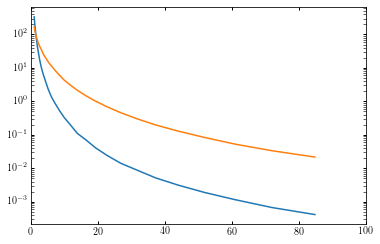

In [174]:
semilogy(r, rho)
semilogy(r, rho_nfw)
xlim(0, 100)

In [175]:
def hernquist_density(M, r, a):
    return a*M / (r*(1+r/a)**3)


In [176]:
rho

array([  3.35383965e+02,   2.00671875e+02,   1.24582862e+02,
         7.58306467e+01,   4.53660365e+01,   2.77101554e+01,
         1.64652017e+01,   1.00204036e+01,   6.31484674e+00,
         3.95511911e+00,   2.32035084e+00,   1.38720700e+00,
         8.87220567e-01,   5.45026103e-01,   3.25618330e-01,
         1.99959957e-01,   1.10510921e-01,   7.17836918e-02,
         4.11737286e-02,   2.43344872e-02,   1.42230353e-02,
         8.92341373e-03,   5.18357740e-03,   3.16650066e-03,
         1.91334536e-03,   1.15600583e-03,   6.76070675e-04,
         4.16110599e-04,   0.00000000e+00])

In [177]:
r

array([   1.        ,    1.17876863,    1.38949549,    1.63789371,
          1.93069773,    2.27584593,    2.6826958 ,    3.16227766,
          3.72759372,    4.39397056,    5.17947468,    6.1054023 ,
          7.19685673,    8.48342898,   10.        ,   11.78768635,
         13.89495494,   16.37893707,   19.30697729,   22.75845926,
         26.82695795,   31.6227766 ,   37.2759372 ,   43.93970561,
         51.79474679,   61.05402297,   71.9685673 ,   84.83428982,  100.        ])

In [178]:
rho_analytic

array([  7.51314801e+00,   6.07280765e+00,   4.87112636e+00,
         3.87338911e+00,   3.04991816e+00,   2.37521461e+00,
         1.82723264e+00,   1.38677772e+00,   1.03702249e+00,
         7.63134393e-01,   5.52006332e-01,   3.92076653e-01,
         2.73218387e-01,   1.86672757e-01,   1.25000000e-01,
         8.20234599e-02,   5.27502120e-02,   3.32615444e-02,
         2.05765534e-02,   1.24993302e-02,   7.46330231e-03,
         4.38537621e-03,   2.53893152e-03,   1.45016407e-03,
         8.18200263e-04,   4.56582959e-04,   2.52298757e-04,
         1.38207745e-04,   7.51314801e-05])

In [179]:
rho_analytic = hernquist_density(1, r, 10)

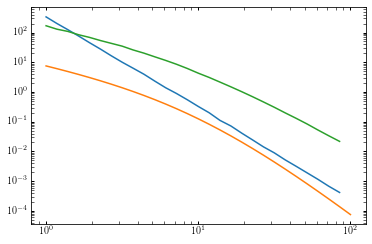

In [181]:
loglog(r, rho)
loglog(r, rho_analytic)
loglog(r, rho_nfw)